In [1]:
# Importing required modules and helper functions for SVM modeling
import sys

sys.path.append(r'e:\Data science\Titanic dataset\notebooks')
# Import needed libraries
from auto_imports import *
model_results_imports()
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

### Data Loading

Load the processed training and prediction datasets for SVM modeling.

In [ ]:
# Load the processed data for training and prediction
train_df = pd.read_csv(r'E:\Data science\Titanic dataset\data\Processed data\Data Modeling\training_data.csv')
predict_df= pd.read_csv(r'E:\Data science\Titanic dataset\data\Processed data\Data Modeling\predicting_data.csv')

In [ ]:
# Display the first few rows of the training data for inspection
train_df.head()

,Pclass,Age,SibSp,Parch,Fare,cell_number,Cabin_letter,Title,FamilyName,Special Agent/route,TicketBatch,SharedTicket,Male,Embarked_C,Embarked_S,Survived
0,3,-0.595254,1,0,-0.312011,0.300857,0.318282,0.155646,0.000000,0.083836,0,0,1,0,1,0
1,1,0.635996,1,0,2.461242,0.384292,0.329517,0.771706,0.384292,0.668414,0,0,0,1,0,1
2,3,-0.287441,0,0,-0.282777,0.309474,0.329517,0.721047,0.384292,0.599342,0,0,0,0,1,1
3,1,0.405137,1,0,1.673732,0.384292,0.329517,0.771706,0.384292,0.387213,0,0,0,0,1,1
4,3,0.405137,0,0,-0.277363,0.296900,0.325708,0.153592,1.000000,0.387708,0,0,1,0,1,0


In [ ]:
# Split features and target variable
X = train_df.drop('Survived' , axis =1) 
y= train_df['Survived']

### Model Definition

Define and configure the Support Vector Machine classifier.

In [ ]:
# Create the SVM classifier with specified hyperparameters
svm_ = SVC(random_state=42 , 
           class_weight='balanced',
           C=0.4 ,
           kernel='rbf',
           probability=True) # make model



In [ ]:
# Split the data into training and testing sets for model evaluation
X_train , X_test , y_train , y_test = train_test_split(
    X , y , test_size=0.2 , random_state=18
)

In [7]:
# Evaluate model using cross-validation for accuracy and F1 score
accuracy , f1 = accuracy_f1_scores(X_train , y_train , svm_) # getting the results

CV=5 , random_state=42 , shuffel=True
accuracy:  0.7809120457007781
f1:  0.7130029262013808
   Accuracy score  F1 score
0        0.783217  0.725664
1        0.769231  0.702703
2        0.795775  0.712871
3        0.774648  0.698113
4        0.781690  0.725664


In [8]:
# Fit the SVM model on the training data
svm_.fit(X_train , y_train) # fit model

,C,0.4
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,'balanced'
,verbose,False


### Model Evaluation

Assess model performance and check for overfitting or underfitting.

In [ ]:
# Calculate accuracy and F1 drop percentages, and get predictions on the test set
accuracy_drop , f1_drop , y_pred =drop_percentages(X_test , y_test , svm_ ,
                 accuracy , f1).values()

In [10]:
# Print drop percentages for evaluation
print(accuracy_drop,f1_drop)

-10.7% -14.6%


In [ ]:
# Show classification report for predictions on the test set
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       109
           1       0.85      0.87      0.86        70

    accuracy                           0.89       179
   macro avg       0.88      0.89      0.88       179
weighted avg       0.89      0.89      0.89       179



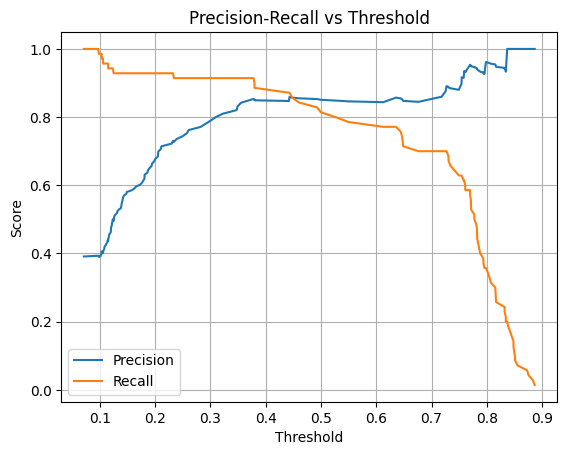

In [ ]:
# Plot precision-recall curve to help select an optimal threshold
from sklearn.metrics import precision_recall_curve

y_probs = svm_.predict_proba(X_test)[:, 1]  # get probability of class 1

# calculate precision, recall and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label="Recall")

plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall vs Threshold")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Apply custom threshold for final predictions and show classification report
y_pred_custom = (y_probs >= 0.44).astype(int) # gettin threshold value

print(classification_report(y_test, y_pred_custom))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       109
           1       0.85      0.87      0.86        70

    accuracy                           0.89       179
   macro avg       0.88      0.89      0.88       179
weighted avg       0.89      0.89      0.89       179



### Model Results

- Model is balanced
- No signs of overfitting or underfitting
- Accuracy ≈ 89%
- F1 ≈ 88%

[Text(0, 0.5, 'Not survived'), Text(0, 1.5, 'Survived')]

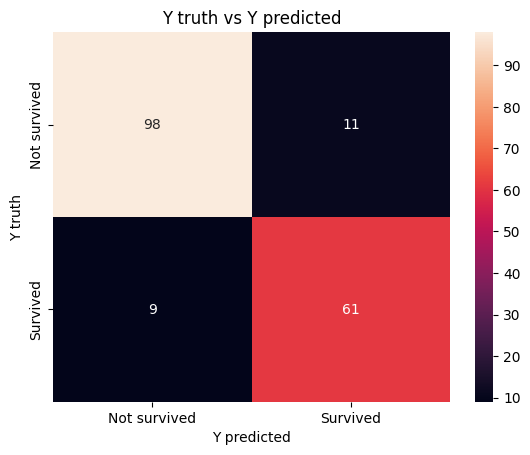

In [16]:
# Plot confusion matrix for the custom threshold predictions
cm = confusion_matrix(y_test , y_pred_custom) 
plt.title('Y truth vs Y predicted')
ax = sns.heatmap(cm ,annot=True)
plt.xlabel('Y predicted')
plt.ylabel('Y truth')
ax.set_xticklabels(['Not survived' , 'Survived'])
ax.set_yticklabels(['Not survived' , 'Survived'])

In [ ]:
# Save model predictions for the prediction set for submission or ensembling
save_model_predictions(svm_.predict(predict_df.drop('PassengerId' , axis=1)) , 'SupportVectorMachine')

In [15]:
# Save the trained SVM model for later use (e.g., in ensembling)
import joblib

joblib.dump(svm_ ,'E:\Data science\Titanic dataset\Models\SupportVectorMachine.pkl')

['E:\\Data science\\Titanic dataset\\Models\\SupportVectorMachine.pkl']